In [136]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [137]:
Orders = pd.read_csv('Orders_1.csv')
Orders.head(1)

,row,order_priority,order_date,order_id,discount,unit_price,order_quantity,sales,shipping_cost,product_base_margin,...,city,postal_code,ship_date,ship_mode,subregion,new_order_date,year_order_date,new_discount,new_margin,profit
0,3689,Medium,28/01/2011,97,3%,3.0,26,75.66,1.0,38.0%,...,Jakarta,NaN,29/01/2011,Regular Air,NaN,2011-01-28,2011,0.03,0.38,26.3


In [138]:
new_tab= Orders[['category','sales','profit']]
new_tab.head(3)

,category,sales,profit
0,Labels,75.66,26.30
1,Chairs & Chairmats,5587.00,4241.99
2,"Scissors, Rulers and Trimmers",3.96,-0.84


In [139]:
new_tab_1 = DataFrame(new_tab.groupby('category')['sales'].sum())
new_tab_1['profit'] = new_tab.groupby('category')['profit'].sum()
new_tab_1.head(3)

,sales,profit
category,,
Appliances,36175.94,18474.52
Binders and Binder Accessories,14160.28,4632.58
Bookcases,53573.90,33694.52


In [140]:
# import K-means from Sklearn.cluster
from sklearn.cluster import KMeans

In [141]:
# create an instance of K-means model with 4 clusters such that it becomes easier to call
# the same later
# let's know try to split clusters into 4 clusters 
K_means_4 = KMeans(n_clusters=4)
df_analyze = new_tab_1
K_means_4.fit(new_tab_1)

# do drop twice, i guess this is because we have 4 clusters now
# so repeat drop twice 
print(K_means_4.cluster_centers_)
unique, counts = np.unique(K_means_4.labels_, return_counts=True)

K_means_4.cluster_centers_
print(dict(zip(unique,counts)))

[[  844.7575   350.5625]
 [33482.212  18099.41  ]
 [61031.12   35772.58  ]
 [ 9354.76    4279.732 ]]
{0: 4, 1: 5, 2: 2, 3: 5}


/Users/Jerry/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Jerry/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


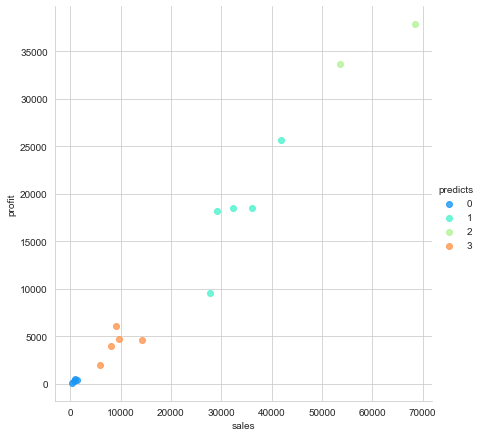

In [142]:
new_tab_1['predicts']=K_means_4.labels_
sns.set_style('whitegrid')
sns.lmplot ('sales','profit', data=new_tab_1
           ,hue ='predicts', palette='rainbow', size=6, aspect=1,fit_reg=False)

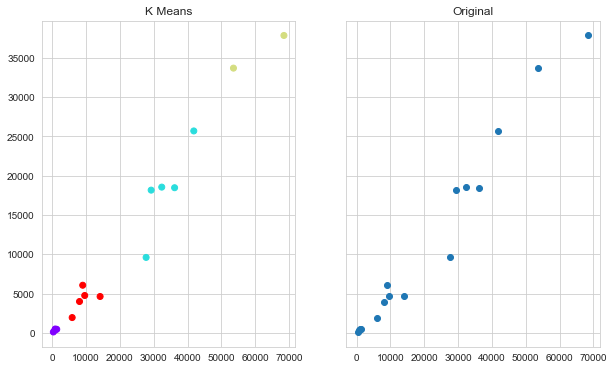

In [143]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(new_tab_1['sales'],new_tab_1['profit'],c=K_means_4.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(new_tab_1['sales'],new_tab_1['profit'])

In [144]:
new_tab_1

,sales,profit,predicts
category,,,
Appliances,36175.94,18474.52,1
Binders and Binder Accessories,14160.28,4632.58,3
Bookcases,53573.90,33694.52,2
Chairs & Chairmats,9020.23,6064.41,3
Computer Peripherals,9614.81,4757.31,3
Envelopes,1343.92,455.46,0
Labels,343.74,116.31,0
Office Furnishings,29249.65,18167.68,1
Office Machines,27759.85,9603.53,1


In [145]:
new_tab_1.sort_values('predicts',ascending=True,inplace=True)
new_tab_1.head(3)

,sales,profit,predicts
category,,,
Envelopes,1343.92,455.46,0
Labels,343.74,116.31,0
Rubber Bands,809.28,336.95,0


In [146]:
new_tab_1['Definition']  = new_tab_1['predicts'].replace({0:'Medium',1:'Low', 2:'High', 3:'poor'})
new_tab_1

,sales,profit,predicts,Definition
category,,,,
Envelopes,1343.92,455.46,0,Medium
Labels,343.74,116.31,0,Medium
Rubber Bands,809.28,336.95,0,Medium
"Scissors, Rulers and Trimmers",882.09,493.53,0,Medium
Appliances,36175.94,18474.52,1,Low
Office Furnishings,29249.65,18167.68,1,Low
Office Machines,27759.85,9603.53,1,Low
Storage & Organization,32377.88,18551.29,1,Low
Tables,41847.74,25700.03,1,Low
